<img src='https://imageup.ru/img93/4099641/snimok-ekrana-2022-12-08-v-115804.jpg' width='1500' margins='0'>

Uploaded to Git

## Темы  

1. Определение 
2. Формулировка проблемы
3. Математические преобразования
    1. Понятие математического шанса
    2. Логарифмическое представление шанса

## 1. Определение 

Логистическая регрессия - статистическая модель классификации.
Я буду говорить про двоичную (бинарную) регрессию

В отличие от линейных моделей, где результатом является некая количественная переменная. То есть некая величина из непрерывного числового ряда. Результатом применения логистической функции является вероятность отнесения события к одному из классов.
Простыми словами вероятность положительного или отрицательного исхода. 1 или 0, выжил пассажир или нет. котик или собака.

* На входе - набор переменных (номинативных и количественных) в качестве предиктора
* На выходе - вероятность отнесения к классу номинативной целевой переменной

В общем виде выражение имеет следующий вид:

$$ p = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k $$

_____

## 2. Формулировка проблемы

Еще раз посмотрим на выражение:

$$ p = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k $$

В левой части выражения:     
 
p - Лежит на промежутке [0,1],


В правой части:

$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k $ , Лежат на промежутке $(-\infty, +\infty)$

$x1$, $x2$...$xb$ - коэффициенты, которые могут принимать любые номинативные или количественные значения

$\beta_0$ - intercept (для простоты восприятия - будем считать, что это точка пересечения Логистическим Дискриминантом оси y)

$\beta_1,\beta_2,\beta_k$ - "веса" коэффициентов. То есть их влияние на целевую переменную



Таким образом выражение имеет вид:

$$ [0,1] = (-\infty, +\infty) $$

### Задача:
выполнить математическое преобразование выражения и привести обе его стороны к одному виду.

_________

## 3. Преобразование 

Преобразование выполняется в два шага

### 3.1 Переход от вероятности к Шансу (odds)

Определение Шанса:

Шанс — это характеристика случайного события, равная отношению вероятности события 
A к вероятности события B

<img src='https://imageup.ru/img240/4099624/rocks.jpg' width='650'>

Вопрос №1: Посчитать вероятность и шанс случайно выбрать черный камушек из мешка

Вопрос №2: Посчитать вероятность и шанс случайно выбрать белый камушек

In [90]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic

In [75]:
data = pd.DataFrame({'p':(i/10 for i in np.arange(0.1,10,0.1)), 
                   'odds':((i/10)/(1-(i/10)) if i !=10 else 99 for i in np.arange (0.1,10,0.1)) 
                  })
data.head()

,p,odds
0,0.01,0.010101
1,0.02,0.020408
2,0.03,0.030928
3,0.04,0.041667
4,0.05,0.052632


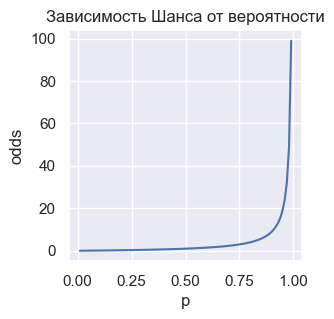

In [76]:
sns.set(rc = {'figure.figsize': (3, 3)})
sns.lineplot(x=data['p'],y=data['odds'])
plt.title('Зависимость Шанса от вероятности', fontdict={'fontsize':12});

Таким образом теперь выражение имеет вид:

$$ [0,+\infty) = (-\infty, +\infty) $$

Тем самым верхняя граница стала равна + бесконечности, но остаётся задача пробразования нижней границы.

### 3.2 Переход от Шанса к Логарифму шансов

Теперь еще раз выполним преобразование функции при помощи логарифма 

In [77]:
log = pd.DataFrame({'log': (math.log(i) if i!=0.0 else -3 for i in data.odds)})
data = data.join(log)

In [78]:
data.iloc[[0,1,2,-3,-2,-1]]

,p,odds,log
0,0.01,0.010101,-4.595120
1,0.02,0.020408,-3.891820
2,0.03,0.030928,-3.476099
96,0.97,32.333333,3.476099
97,0.98,49.000000,3.891820
98,0.99,99.000000,4.595120


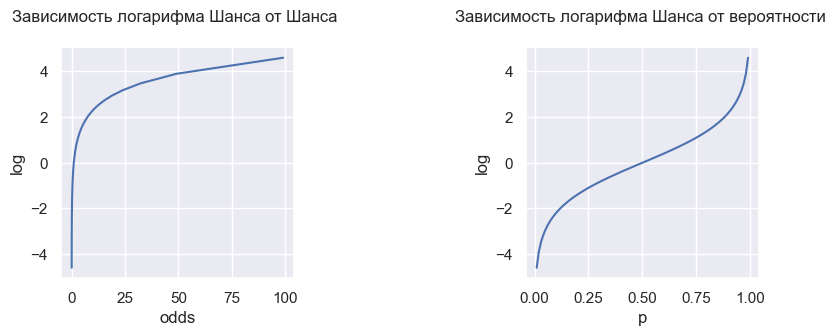

In [79]:
sns.set(rc = {'figure.figsize': (9, 3)})
# Зависимость логарифма Шанса от Шанса
plt.subplot(1,2,1)
sns.lineplot(x=data['odds'], y=data['log'])
plt.title('Зависимость логарифма Шанса от Шанса \n')
# Зависимость логарифма Шанса от вероятности
plt.subplot(1,2,2)
sns.lineplot(x=data['p'], y=data['log'])
plt.title('Зависимость логарифма Шанса от вероятности \n');

plt.subplots_adjust(hspace=0.5, wspace=1)
plt.show()

Теперь, мы привели две части уравнения к следующему виду:

$$ (-\infty,+\infty) = (-\infty, +\infty) $$

Таким образом, вероятность может быть выражена через экспаненту функции, которая описывает линию (область) дискиминатна

$$ p =  \frac{exp(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k)}{1+ exp(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k)} $$

## 4. Модель без предикторов

In [118]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()]

In [120]:
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Thu, 08 Dec 2022   Deviance:                       964.52
Time:                        17:40:19   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):          1.110e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [106]:
math.exp(-0.3799)

0.6839297987726981

In [113]:
df.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [115]:
290/424

0.6839622641509434

## 5. Модель с одним предиктором

Добавим один предиктор в модель. Пусть это будет Пол

In [143]:
df.groupby('Sex', as_index=False).Survived.value_counts()

,Sex,Survived,count
0,female,1,197
1,female,0,64
2,male,0,360
3,male,1,93


In [144]:
len(df.Sex)

714

In [150]:
male_odds = 93/(714-93)
female_odds = 197/(714-197)
print(female_odds, male_odds)

only_male_odds = 93/(93+360)
only_female_odds = 197/(197+64)
print(only_female_odds, only_male_odds)

0.38104448742746616 0.1497584541062802
0.7547892720306514 0.2052980132450331


In [124]:
glm_binomial = smf.glm(formula='Survived ~ Sex', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Thu, 08 Dec 2022   Deviance:                       750.70
Time:                        17:41:01   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1243      0.144      7.814      0.000       0.842       1.406
Sex[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
===============================================================================
"""

Здесь Intercept 1.1243

In [126]:
odds= math.exp(1.1243)
odds

3.078061451600862

In [129]:
p = odds/(1+odds)
p

0.7547854509138294

In [131]:
math.exp(-2.4778)

0.08392766349580283

In [139]:
x = odds*0.08392766349580283
x = x/(1+x)
x

0.20529875367251643

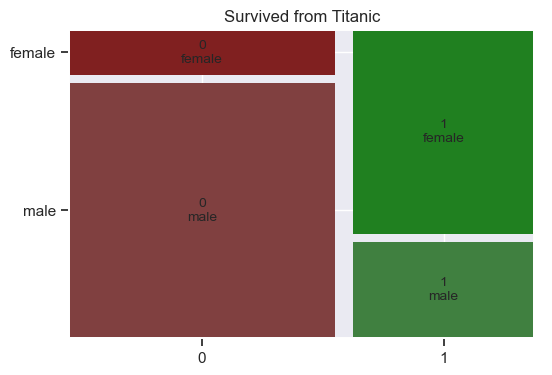

In [141]:
plt.rcParams['figure.figsize']=(6, 4) 
mosaic(df, ['Survived', 'Sex'], gap = 0.04, title='Survived from Titanic')
plt.show()